In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime

## Part 1

In [162]:
temps = pd.read_csv('../../data/ansett.csv')

melsyd_economy = (
    temps
    .assign(Date = lambda x:x.Year.astype(str)+ ' ' + x.Week)
    .drop(['Year', 'Index', 'Week'], axis=1)
    .query('Airports == \'ADL-PER\'')
    .query('Class == \'Economy\'')
    .assign(Passengers = lambda x: x.Passengers/1000)
)
melsyd_economy.head()

,Airports,Class,Passengers,Date
176,ADL-PER,Economy,2.084,1987 W26
177,ADL-PER,Economy,2.186,1987 W27
178,ADL-PER,Economy,2.137,1987 W28
179,ADL-PER,Economy,2.090,1987 W29
180,ADL-PER,Economy,1.595,1987 W30


<AxesSubplot:title={'center':'Ansett airlines economy class'}, xlabel='Week', ylabel="Passengers ('000's)">

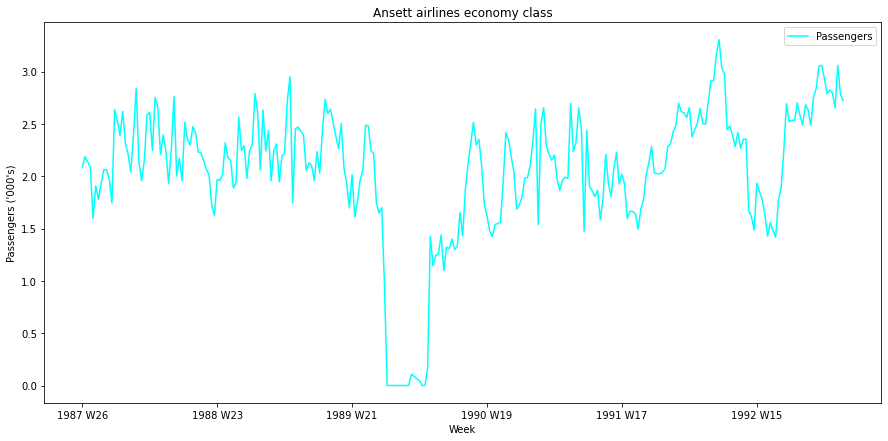

In [163]:
melsyd_economy.plot(x='Date', 
           y='Passengers', 
           figsize=(15,7), 
           xlabel='Week', 
           ylabel='Passengers (\'000\'s)', 
           title='Ansett airlines economy class',
#                     subtitle='Melbourne-Sydney',
           color = 'cyan', 
          )

## Part 2

In [164]:
temps = pd.read_csv('../../data/PBS.csv')
temps.columns

Index(['Index', 'Year', 'Month', 'Concession', 'Type', 'ATC1', 'ATC1_desc',
       'ATC2', 'ATC2_desc', 'Scripts', 'Cost'],
      dtype='object')

In [165]:
def get_month(mtext):
#     print(mtext)
    result=0;
    if mtext == 'Jan': result = 1
    elif mtext == 'Feb': result = 2
    elif mtext == 'Mar': result = 3    
    elif mtext == 'Apr': result = 4    
    elif mtext == 'May': result = 5    
    elif mtext == 'Jun': result = 6    
    elif mtext == 'Jul': result = 7    
    elif mtext == 'Aug': result = 8    
    elif mtext == 'Sep': result = 9    
    elif mtext == 'Oct': result = 10    
    elif mtext == 'Nov': result = 11   
    elif mtext == 'Dec': result = 12
    return result    
    
def extract_month(df):
    df2 = df.map(get_month)
    return df2

In [179]:
a10 = (
    temps
#     .head(1530)
    .drop(['Index'], axis=1)
    .query('ATC2 == \'A10\'')
    .filter(items=['Year', 'Month', 'Concession', 'Type', 'Cost'])
    .assign(Month = lambda x: extract_month(x.Month))
    .assign(Date = lambda x: pd.to_datetime(dict(year=x.Year, month=x.Month, day=1)))
    .drop(['Year', 'Month'], axis=1)
    .set_index('Date')
    .resample('1M')
    .sum()
    .assign(Cost = lambda x: x.Cost/1e6)
#     .sum('Cost')
)
a10.head()

,Cost
Date,
1991-07-31,3.526591
1991-08-31,3.180891
1991-09-30,3.252221
1991-10-31,3.611003
1991-11-30,3.565869


<AxesSubplot:title={'center':'Monthly sales of antidiabetic drugs in Australia'}, xlabel='Date', ylabel="Millions ('000's)">

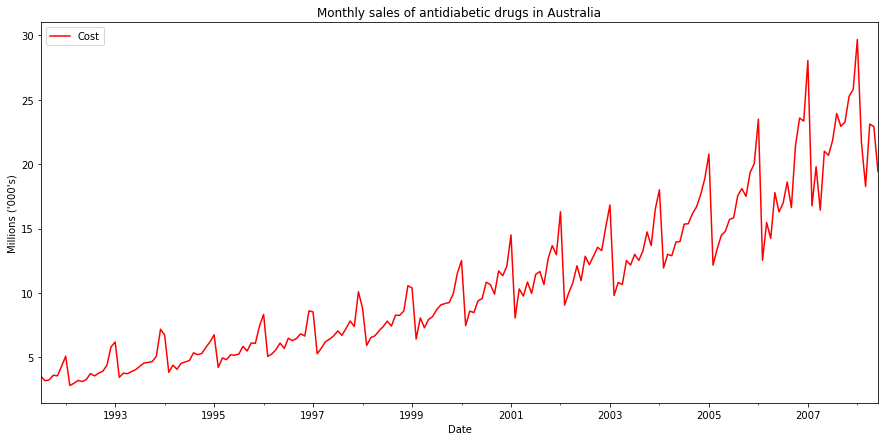

In [180]:
a10.plot(y='Cost', 
           figsize=(15,7), 
           xlabel='Date', 
           ylabel='Millions (\'000\'s)', 
           title='Monthly sales of antidiabetic drugs in Australia',
           color = 'red', 
          )

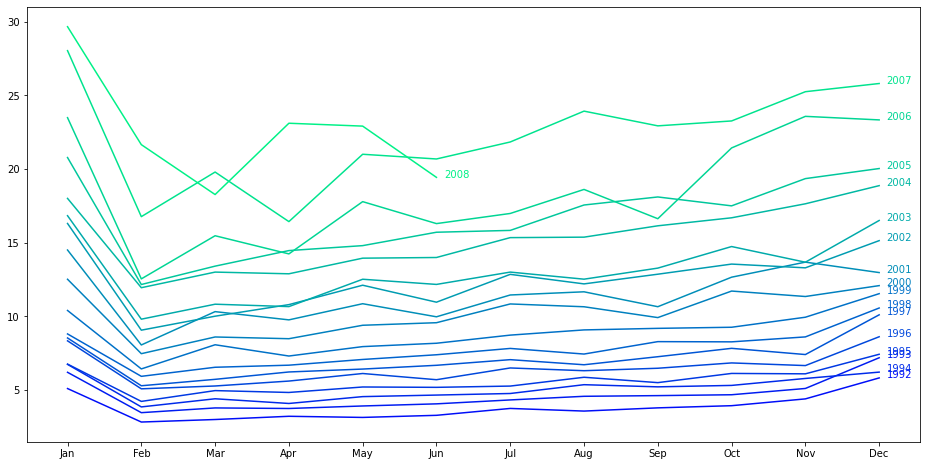

In [263]:
df = a10.copy()
df.reset_index(inplace=True)
df['Year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['Year'].unique()
years_count = len(years)

cmap = mpl.cm.winter
norm = mpl.colors.Normalize(vmin=0, vmax=years_count)

fig, ax = plt.subplots(figsize=(16, 8))

for i in range(1, years_count): 
    the_year = years[i]
    to_plot = df.query('Year == @the_year').filter(['month','Cost'])
    ax.plot(to_plot['month'], to_plot['Cost'], color=cmap(norm(i)))
    
    ax.text(df.loc[df.Year==years[i], :].shape[0]-.9,
        df.loc[df.Year==years[i], 'Cost'][-1:].values[0],
        years[i], color=cmap(norm(i)))

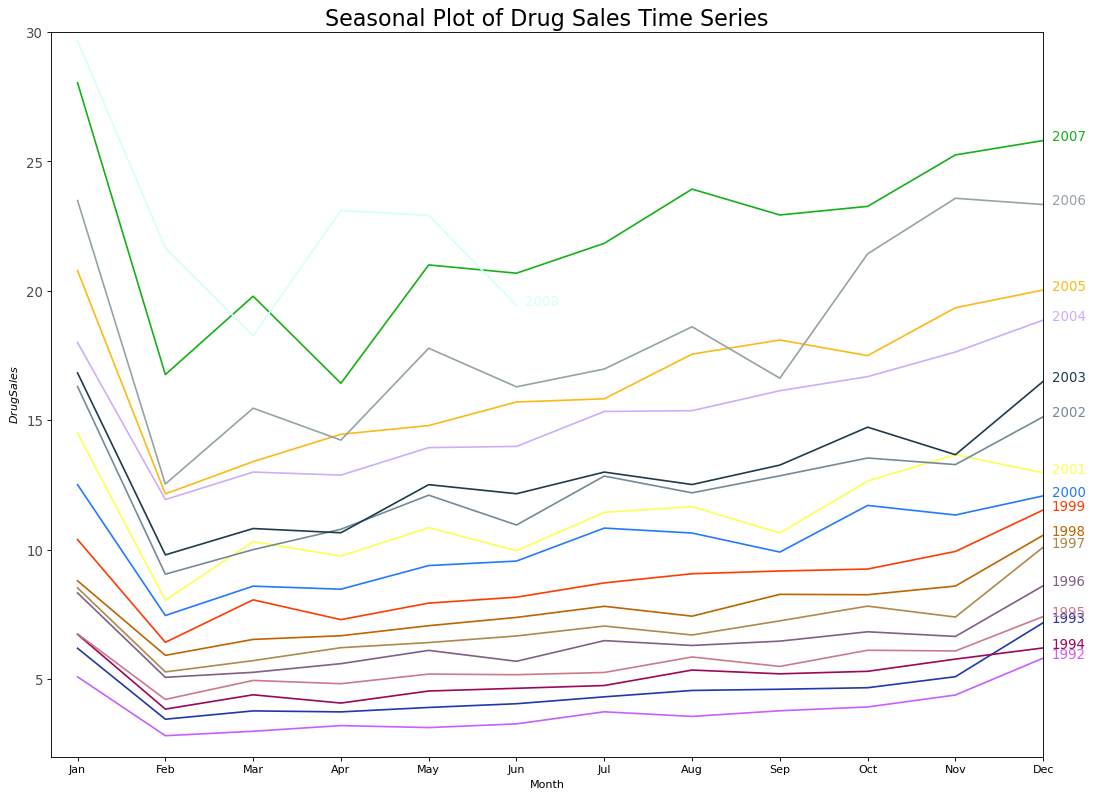

In [209]:
df = a10.copy()
df.reset_index(inplace=True)
df['Year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
years = df['Year'].unique()

plt.figure(figsize=(16,12), dpi=80)
for i, y in enumerate(years):
    if i>0: 
        plt.plot('month', 'Cost', data=df.loc[df.Year==y,:], color = mycolors[i], label=y)
        plt.text(df.loc[df.Year==y, :].shape[0]-.9, df.loc[df.Year==y, 'Cost'][-1:].values[0], y, fontsize=12, color=mycolors[i])
    
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()